# EDA and Data Cleaning

In [1]:
# import all important libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
# Read DataSet
dataset = pd.read_csv('diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# use shape function to check the total number rows and columns in our dataset
dataset.shape

(768, 9)

In [4]:
# use info function to about the know about the datatypes 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# find missing values in the form of percentage
(dataset.isnull().sum()/dataset.shape[0])*100

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [6]:
# distribution of diabteas & normal people
dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [7]:
#checking the duplicate values
dataset.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

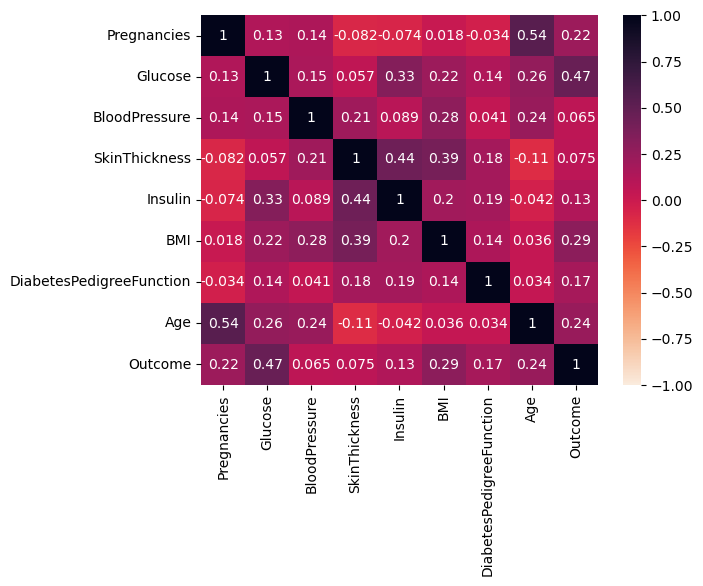

In [8]:
#checking the correlation by using heatmap
sns.heatmap(dataset.corr(), vmin=-1, vmax=1,
annot=True,cmap="rocket_r")
plt.show()

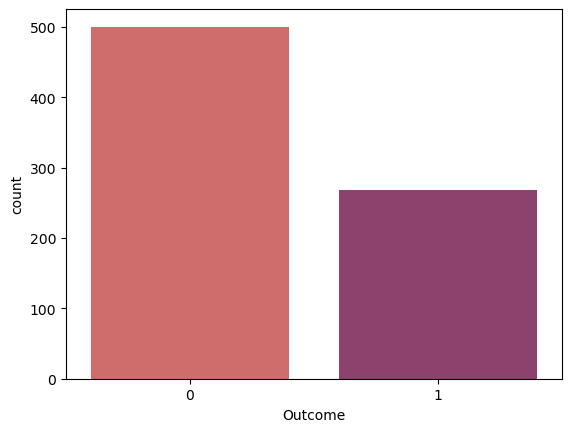

In [10]:
sns.countplot(x='Outcome',data= dataset,palette = 'flare')
plt.show()

<Axes: xlabel='Age', ylabel='BloodPressure'>

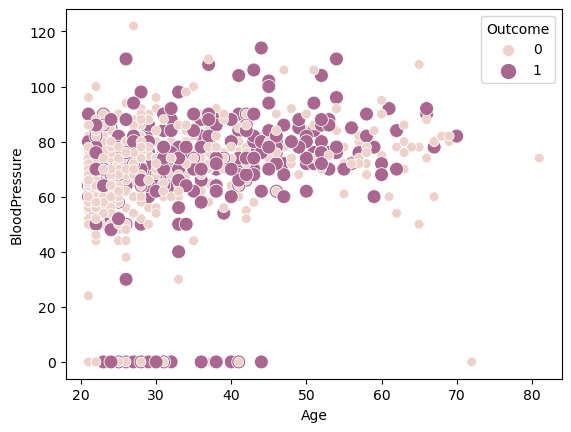

In [9]:
# Assuming "size" column is missing or has non-numeric values
sns.scatterplot(
    data=dataset, x="Age", y="BloodPressure", hue="Outcome",size="Outcome",
    sizes=(100, 50),hue_norm=(0, 2), legend="full"
)

<Axes: xlabel='BMI', ylabel='Glucose'>

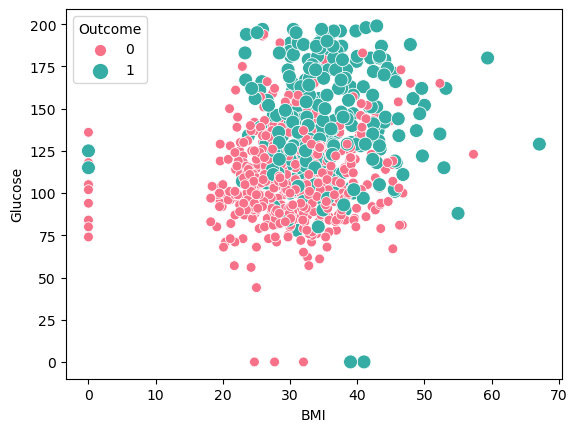

In [10]:
# Assuming "size" column is missing or has non-numeric values
sns.scatterplot(
    data=dataset, x="BMI", y="Glucose", hue="Outcome",size="Outcome",
    sizes=(100, 50),hue_norm=(0, 2),palette="husl"
)

In [11]:
#checking 0 values in dataset

(dataset[dataset.columns] == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [12]:
# Replacing 0 values with median

for i in ["Glucose","BMI","Insulin","BloodPressure"]:
    dataset[i].replace({0:dataset[i].median()},inplace = True)

In [13]:
#again checking 0 values in dataset
(dataset[dataset.columns] == 0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

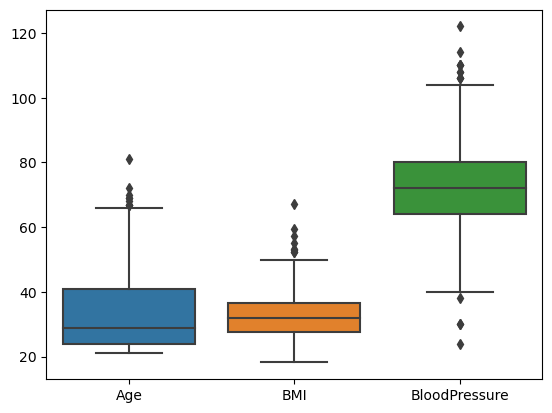

In [14]:
# checking the outliers
# sns.boxplot(data=dataset)
sns.boxplot(data=dataset[["Age", "BMI", "BloodPressure"]])
plt.show()

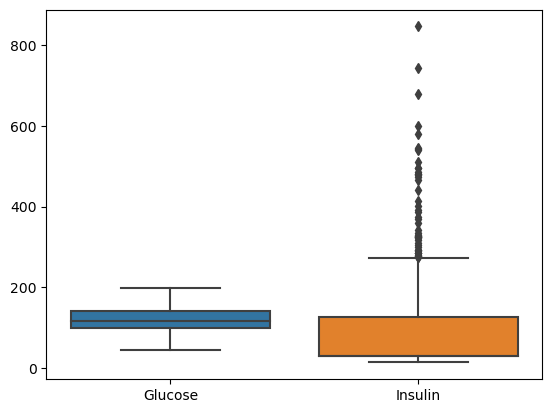

In [15]:
# checking the outliers
# sns.boxplot(data=dataset)
sns.boxplot(data=dataset[["Glucose", "Insulin"]])
plt.show()

In [16]:
#Removing Outliers

# Code-1 of removing outlier

# # Assuming your dataset has columns named "Insulin" and "BloodPressure"
# columns_to_check = ["Age","BMI","BloodPressure","Insulin"]

# # Calculate IQR for each column
# q1 = dataset[columns_to_check].quantile(0.25)
# q3 = dataset[columns_to_check].quantile(0.75)
# IQR = q3 - q1

# # Calculate min and max ranges for each column
# min_ranges = q1 - (1.5 * IQR)
# max_ranges = q3 + (1.5 * IQR)
# # Filter the dataset based on combined conditions
# dataset = dataset[
#     (dataset[columns_to_check[0]] < max_ranges[columns_to_check[0]]) &
#     (dataset[columns_to_check[1]] < max_ranges[columns_to_check[1]]) &
#     (dataset[columns_to_check[0]] > min_ranges[columns_to_check[0]]) &
#     (dataset[columns_to_check[1]] > min_ranges[columns_to_check[1]])
# ]



# Code-2 of removing outlier
def outlier_treatment():
    l = ["BMI","Glucose","SkinThickness","Age","BloodPressure","Insulin","Pregnancies","DiabetesPedigreeFunction"]
    for i in l:
        x = np.quantile(dataset[i],[0.25,0.75])
        iqr = x[1]-x[0]
        uw = x[1]+1.5*iqr
        lw = x[0]-1.5*iqr
        dataset[i]  = np.where(dataset[i]>uw,uw,(np.where(dataset[i]<lw,lw,dataset[i])))
        
outlier_treatment()

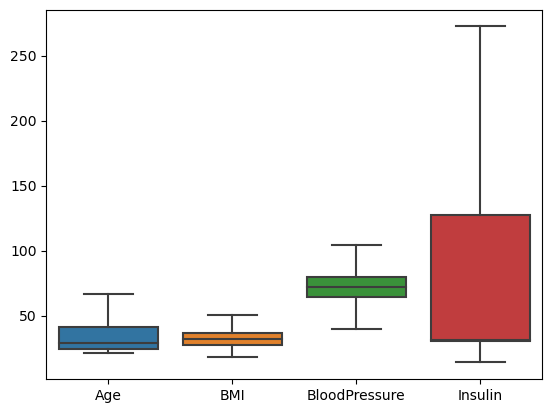

In [17]:
# checking the outliers
# sns.boxplot(data=dataset)
sns.boxplot(data=dataset[["Age", "BMI", "BloodPressure","Insulin"]])
plt.show()

In [18]:
dataset.shape

(768, 9)

C:\Users\H-H Traders\AppData\Local\Temp\ipykernel_13600\1744127450.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Age"], label="Age", kde=1)  # Column 1 ka histogram plot
C:\Users\H-H Traders\AppData\Local\Temp\ipykernel_13600\1744127450.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.d

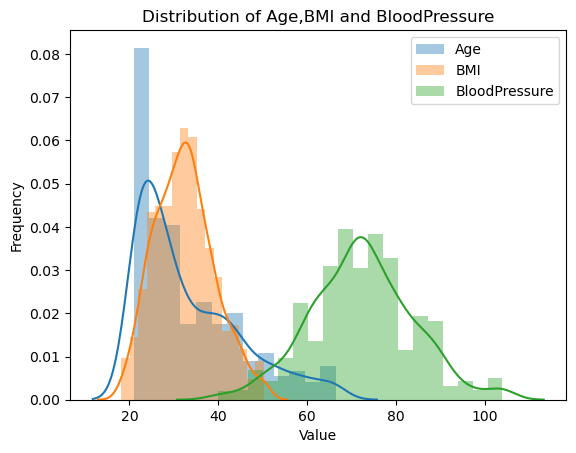

In [19]:
# Doing Feature Scaling by using standarization method

sns.distplot(dataset["Age"], label="Age", kde=1)  # Column 1 ka histogram plot
sns.distplot(dataset["BMI"], label="BMI", kde=1)  # Column 2 ka histogram plot
sns.distplot(dataset["BloodPressure"], label="BloodPressure", kde=1)  # Column 3 ka histogram plot
# Plot titles and labels
plt.title("Distribution of Age,BMI and BloodPressure")
plt.xlabel("Value")
plt.ylabel("Frequency")

# Legend 
plt.legend()
# show plot
plt.show()

C:\Users\H-H Traders\AppData\Local\Temp\ipykernel_13600\1159412108.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Insulin"], label="Insulin", kde=1)  # Column 1 ka histogram plot


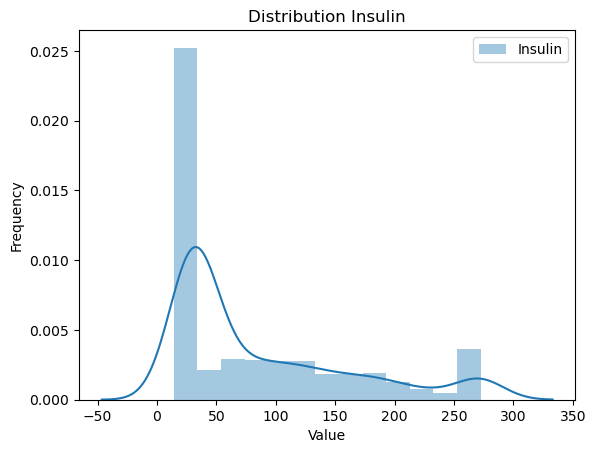

In [20]:
sns.distplot(dataset["Insulin"], label="Insulin", kde=1)  # Column 1 ka histogram plot
# Plottitle and labels
plt.title("Distribution Insulin")
plt.xlabel("Value")
plt.ylabel("Frequency")
# Legend 
plt.legend()
# show plot
plt.show()

In [21]:
# checking the statistical summary of dataset
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.837240,121.656250,72.358073,20.511719,86.139811,32.389063,0.458914,33.199870,0.348958
std,3.344157,30.438286,11.697097,15.844744,76.287377,6.667627,0.285596,11.628404,0.476951
min,0.000000,44.000000,40.000000,0.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,13.500000,199.000000,104.000000,80.000000,272.375000,50.250000,1.200000,66.500000,1.000000


# Machine learning for prediction

In [22]:
#separating target variable

X = dataset[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y = dataset['Outcome']

# x = dataset.drop(columns=['Outcome'])
# y = dataset['Outcome']

In [24]:
#Scaling the Data

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# x_scaled = scaler.fit_transform(x)

In [23]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,30.5,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,30.5,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,30.5,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0


In [24]:
# import libraries and split data 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [25]:
#Scaling the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [26]:
# fit the model
from sklearn.svm import SVC
svc_model = SVC(kernel='linear', C=1.0) # default regularization
svc_model.fit(x_train,y_train)
y_pred = svc_model.predict(x_test)

### Testing or Evaluating or predicting your model

In [27]:
# Model fitness score checking
print("score for test data =",svc_model.score(x_test, y_test))

score for test data = 0.7727272727272727


In [28]:
print("score for training data = ",svc_model.score(x_train, y_train))

score for training data =  0.7736156351791531


In [29]:
# creating the report
from sklearn.metrics import accuracy_score, classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        99
           1       0.71      0.62      0.66        55

    accuracy                           0.77       154
   macro avg       0.76      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154



In [30]:
# Now Evaluation Using confusion_matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[85 14]
 [21 34]]


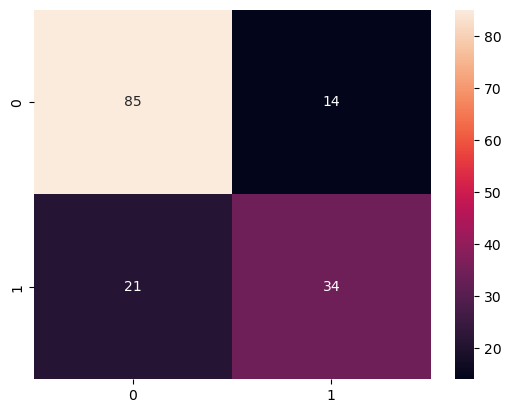

In [31]:
sns.heatmap(cm, annot=True)
plt.show()

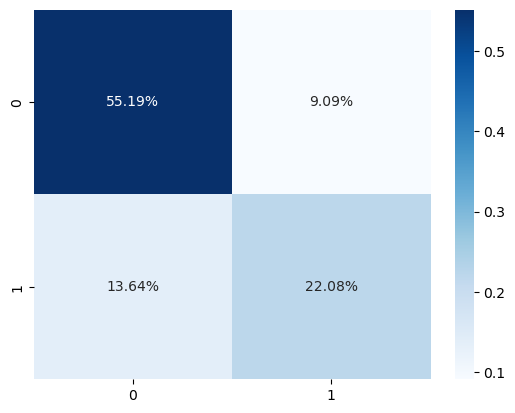

In [32]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')
plt.show()

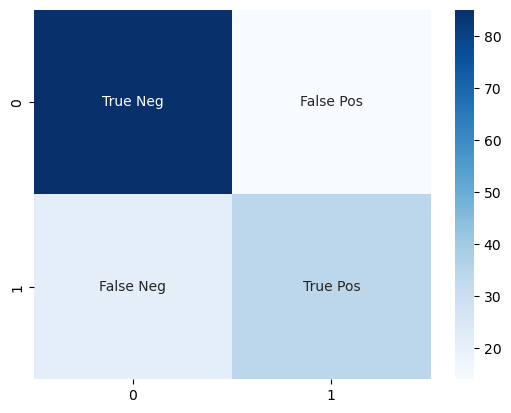

In [33]:
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
plt.show()

In [34]:
acc1 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc1}")

Accuracy score: 0.7727272727272727


In [35]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
# step no 6 - user input
p_pregnancies = float(input("Enter Pregnancies: "))
p_glucose=float(input("Enter glucose: "))
p_bloodPressure=float(input("Enter bp: "))
p_skinThickness=float(input("Enter SkinThickness: "))
p_insulin=float(input("Enter Insulin: "))
p_bmi=float(input("Enter bmi: "))
p_diabetesPedigreeFunction=float(input("Enter DiabetesPedigreeFunction: "))
p_age = float(input("Enter age: "))
user_input = np.array([[p_pregnancies,p_glucose,p_bloodPressure,p_skinThickness,p_insulin,p_bmi,p_diabetesPedigreeFunction,p_age]])
prediction = svc_model.predict(user_input)
if prediction[0] == 0:
    print("The patient don't have diabteas. ")
else:
    print("yes the patient has diabtes:")